In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from io import BytesIO


In [4]:
t_url = 'https://prod-images-static.radiopaedia.org/images/2089213/f12063879a29e672f675977fabdc89_gallery.jpeg'
rq_resp = requests.get(t_url)
rq_cont = rq_resp.content
print(rq_cont)
byte_f = BytesIO(rq_cont)


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc2\x00\x0b\x08\x01\xba\x01\x9f\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x03\x04\x07\x02\x01\x08\x00\t\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\xfed{\xef\xbd{\xd7r\xdehtjf,]\xcbIp$M\x9d\x84\xa7\x1d@ZO\x01\x87\x06:\x82\xd2*\x8dJ\xc3\x04\xae.\xd5\x92Y&\x95\xf47\xf3\xeb\xf7\xe9,\xd9\xb9b\xd9\x13L\x05\xed\xc39\xed_E(Y\xc5\xa8\x9c&\xe0\xb9R\xb22\xe2\xe0@h\xb8\xc2\x8f\x11P\x10\xbe.\x94>~\xfd\xf9\xbb\xe8|\r\x86\xf1;\x13\xd9\xb3v\xd5\xdb\xf2\x8e\xa5\xd17\x1d\xc6\xf9Fv6\xdbUba_\x0e\x9a\x0c@%\xec\xb72\x1b\xe5\xaf*\xd2\x184h`\xe2\xaa\xf9\xfb\xec\xd3\x97\xacyJ\x0el\xdd\xb1HEJ\xff\x00\xa6l\xdeKYjvh\x1c\xad\xf9\xdb\xa5$\xd1\

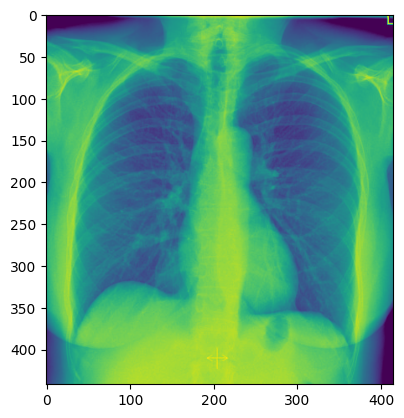

(442, 415) 0 255 256


In [5]:
# Assuming byte_f is already defined and contains image data in bytes
np_img = plt.imread(byte_f, format='jpg')  # Use np_img here to avoid confusion
plt.imshow(np_img)
plt.show()

# Printing the image properties
print(np_img.shape, np_img.min(), np_img.max(), len(np.unique(np_img)))


120.0


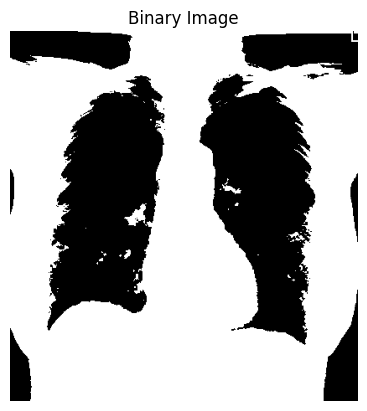

In [7]:
# Correcting the code
th_, mb_mask = cv2.threshold(np_img, 120, 255, cv2.THRESH_BINARY)
print(th_)

# Display the binary image
plt.imshow(mb_mask, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()



[  0 255] 255
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


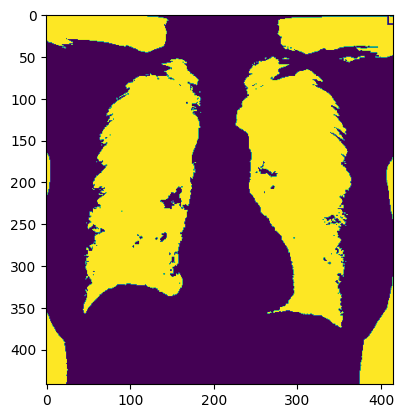

In [8]:
print(np.unique(mb_mask), mb_mask.max())
inv_mask = mb_mask.max() - mb_mask
print(inv_mask)
plt.imshow(inv_mask)
plt.show()



37 6
[[[267 355]]

 [[266 356]]

 [[264 356]]

 [[264 357]]

 [[266 357]]

 [[267 356]]

 [[268 356]]] [[[155  53]]

 [[154  54]]

 [[149  54]]

 ...

 [[162  54]]

 [[158  54]]

 [[157  53]]]


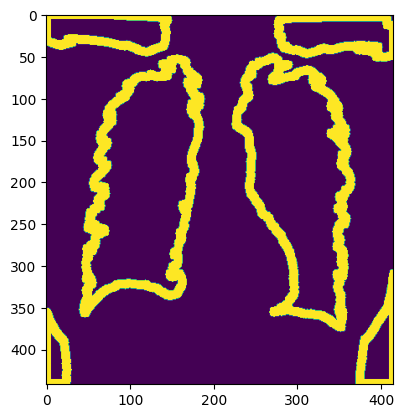

In [9]:
contours, h_ = cv2.findContours(inv_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
t_cont_list = [x for x in sorted(contours, key=cv2.contourArea, reverse = True) if cv2.contourArea(x) > 1000]
print(len(contours), len(t_cont_list))
print(contours[0], t_cont_list[0])

draw_canv = np.zeros_like(inv_mask)
cv2.drawContours(draw_canv, t_cont_list, -1, (255, 255, 255), 10)
plt.imshow(draw_canv)
plt.show()

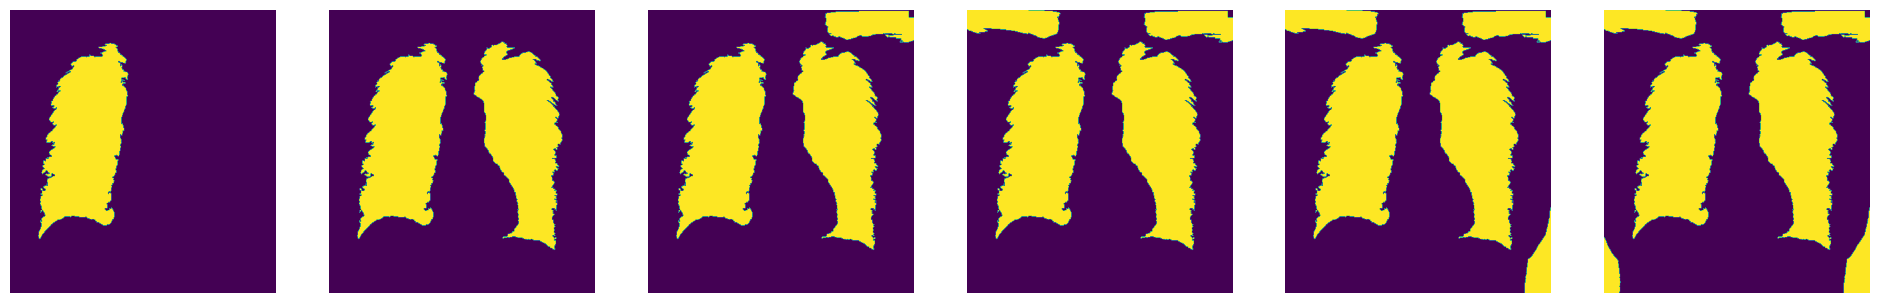

In [10]:
canvas = np.zeros_like(inv_mask)
plt.figure(figsize=(24,4))
for idx in range(len(t_cont_list)):
  plt.subplot(1,6,idx+1)
  cv2.drawContours(canvas, t_cont_list, idx, (255,255,255), -1)
  plt.imshow(canvas)
  plt.axis('off')
plt.show()


In [11]:
# Git 설정
!git config --global user.name "hyunjung930731"  # GitHub 사용자명
!git config --global user.email "your-email@example.com"  # GitHub 이메일

# GitHub 저장소 클론
!git clone https://github.com/hyunjung930731/x-ray-image-processing.git


Cloning into 'x-ray-image-processing'...


In [12]:
# 작업한 파일을 저장소로 복사
!cp xray_contour.ipynb /content/x-ray-image-processing/


cp: cannot stat 'xray_contour.ipynb': No such file or directory


In [13]:
# 저장소 디렉토리로 이동
%cd /content/x-ray-image-processing/

# 파일 추가
!git add xray_contour.ipynb


/content/x-ray-image-processing
fatal: pathspec 'xray_contour.ipynb' did not match any files


In [ ]:
# 현재 Colab 작업 디렉토리 확인
!ls /content/
